# SOCIAL ANXIETY PREVENTION RECOMMENDER

## PROBLEM STATEMENT 

With over 5 million Kenyans struggling with anxiety disorders, MindGuard revolutionizes mental health through an intelligent early-warning system. Using Feedforward Neural Networks to interpret complex behavioral patterns, MindGuard detects anxiety risks and delivers personalized preventative interventions, helping individuals maintain optimal mental wellness before clinical intervention becomes necessary.

## OBJECTIVES

1. Can we create an intelligent early-warning system that accurately predicts who is likely to experience anxiety problems, allowing for timely prevention and support?

2. How can we provide personalized lifestyle recommendations that are most likely to help individuals reduce their anxiety risk based on their unique profile?

3. Which lifestyle factors have the biggest impact on anxiety and how can these insights guide effective prevention strategies and public health initiatives?




## PLAN OF EXECUTION

- EDA 
- PREPROCESSING
- MODEL BUILDING
- MODEL INTERPRETATION 
- DEPLOYMENT



## EDA AND PREPROCESSING

### Load Dataset

In [2]:
#import needed libraries and load datasets to be used
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score


enhanced_data = pd.read_csv('enhanced_anxiety_dataset.csv')
family_data = pd.read_csv('family_anxiety_14_dataset.csv')



### Perusing Data

Undersatanding what the data entails, conduct eda and preprocessing on the dataset

In [3]:
#Print first rows of enhanced anxiety dataset
enhanced_data.head()


,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [4]:
#Scheme the data types of the enhanced dataset
enhanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [5]:
#Summary stats for enhanced dataset
enhanced_data.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [6]:
#Check for missing values
enhanced_data.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

In [7]:
enhanced_data_copy = enhanced_data.copy()

In [8]:
#Preprocessing 
#Define X and y

X = enhanced_data.drop(columns='Anxiety Level (1-10)')
y = enhanced_data['Anxiety Level (1-10)']

In [9]:
#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [10]:
#Identify Categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns

In [11]:
# Define preprocessing steps for numerical and categorical features
#numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler())
#])

categorical_transformers = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keeps numerical features as they are
)

In [12]:
# Create a pipeline with preprocessing and classifier
pipeline = Pipeline([
	('preprocessing', preprocessing),
	('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [13]:

# Use the correct parameter grid for the pipeline
param_grid_pipeline = {
	'classifier__criterion': ['gini', 'entropy'],
	'classifier__max_depth': [3, 5, 10, None],
	'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid_pipeline, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 10, None],
                         'classifier__min_samples_split': [2, 5, 10]},
             verbose=1)

In [14]:
print(grid_search.best_params_)


{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_split': 2}


In [15]:
#Predict model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.33121212121212124


In [16]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.34      0.53      0.42       303
         2.0       0.33      0.22      0.26       541
         3.0       0.35      0.30      0.32       699
         4.0       0.32      0.43      0.37       705
         5.0       0.33      0.43      0.38       500
         6.0       0.00      0.00      0.00       195
         7.0       0.00      0.00      0.00        38
         8.0       0.32      0.73      0.45       113
         9.0       0.00      0.00      0.00       113
        10.0       0.00      0.00      0.00        93

    accuracy                           0.33      3300
   macro avg       0.20      0.26      0.22      3300
weighted avg       0.29      0.33      0.30      3300



c:\Users\002401\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\002401\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\002401\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


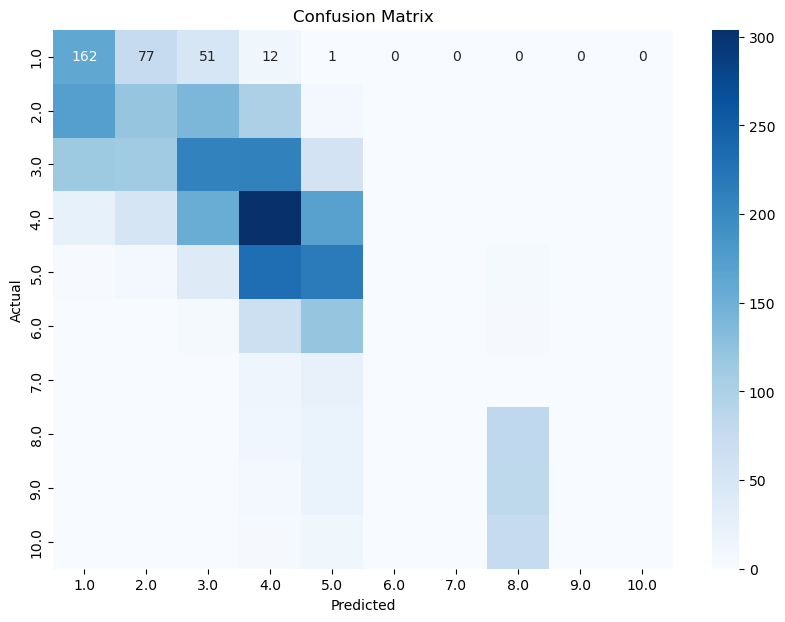

In [18]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm  = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC AUC
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
roc_auc = roc_auc_score(y_test_bin, y_prob, average="macro", multi_class="ovr")
roc_auc

0.8154054826393979

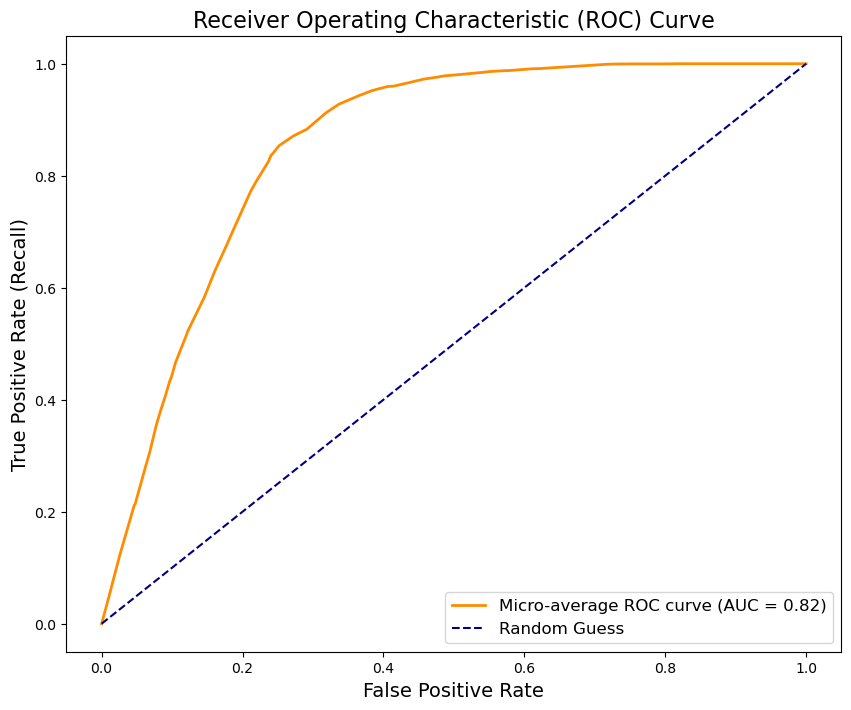

In [22]:
from sklearn.metrics import roc_curve
import numpy as np

# Compute ROC curve and ROC area for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(n_classes):
	fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
	roc_auc_dict[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())

plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
		 label=f'Micro-average ROC curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1.5, label='Random Guess')

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (Recall)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()